In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
input_size = 784  # 28x28 images
hidden_size = 500
output_size = 10  # 10 classes for MNIST
num_epochs = 500
batch_size = 64
learning_rate = 1e-3
momentum = 0.9

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Split dataset into training and validation sets (8:2)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network




In [2]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 7 * 7, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28) 
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [3]:
model = NeuralNet(input_size, hidden_size, output_size).to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) 
train_errors = []
val_errors = []  


In [4]:
def train(num_epochs):
    for epoch in range(num_epochs):
        # print(f"Epoch {epoch+1}/{num_epochs}")
        model.train()
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.view(-1, 28*28).to("cuda")
            outputs = model(images)
            labels = labels.to("cuda")
            # print(outputs.device)
            # print(labels.device)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_error = 100 * (1 - correct / total)
        train_errors.append(train_error)
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(-1, 28*28).to("cuda")
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                labels = labels.to("cuda")
                # print(predicted.device)
                # print(labels.device)
                correct += (predicted == labels).sum().item()
        
        val_error = 100 * (1 - correct / total)
        val_errors.append(val_error)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Error: {train_error:.2f}%, Validation Error: {val_error:.2f}%')
    plt.plot(train_errors, label='Train Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.savefig("./new_conv.png")
    plt.show()


Epoch [1/250], Train Error: 25.96%, Validation Error: 7.79%
Epoch [2/250], Train Error: 6.32%, Validation Error: 4.93%
Epoch [3/250], Train Error: 4.25%, Validation Error: 3.67%
Epoch [4/250], Train Error: 3.29%, Validation Error: 2.62%
Epoch [5/250], Train Error: 2.72%, Validation Error: 2.44%
Epoch [6/250], Train Error: 2.44%, Validation Error: 1.92%
Epoch [7/250], Train Error: 2.09%, Validation Error: 1.74%
Epoch [8/250], Train Error: 1.86%, Validation Error: 1.58%
Epoch [9/250], Train Error: 1.72%, Validation Error: 1.62%
Epoch [10/250], Train Error: 1.59%, Validation Error: 1.62%
Epoch [11/250], Train Error: 1.42%, Validation Error: 1.37%
Epoch [12/250], Train Error: 1.36%, Validation Error: 1.43%
Epoch [13/250], Train Error: 1.25%, Validation Error: 1.22%
Epoch [14/250], Train Error: 1.22%, Validation Error: 1.37%
Epoch [15/250], Train Error: 1.04%, Validation Error: 1.38%
Epoch [16/250], Train Error: 0.99%, Validation Error: 1.17%
Epoch [17/250], Train Error: 0.95%, Validation E

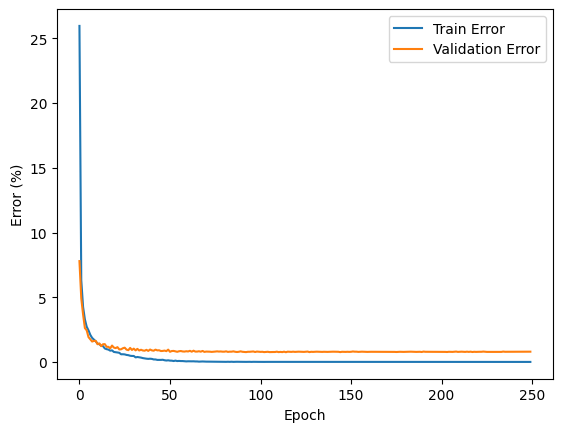

In [5]:
train(250)